# EE482 - Final Project 2
### Face recognition
### Team Members:
1. Ahmed Alkhayal - 1945541
2. Abdulaziz Ebrahim - 1946282
3. Turki Al-Zahrani - 1935944

# imports

In [6]:
import cv2
import face_recognition
import pickle
import os
import dlib
import matplotlib.pyplot as plt
from imutils import paths

## 1- Loading dataset

In [7]:
# Dataset folder path
print("[1] Processing datasets...")
imgPaths = list(paths.list_images('../input/face-recognition2/dataset'))
# Create an of known Encodings and Names
trainEncodings = []
Names = []

[1] Processing datasets...


## 2- Processing images
    - Read face images and corresponding names
    - Extract (x,y)-location for each face
    - Compute the encoding of each face and store them

In [8]:
length = len(imgPaths)
# loop over the images
for (i, imgPaths) in enumerate(imgPaths):
	
 	# Extract names from img path folder
	print(f"[2] Processing image {i + 1}/{length}")
	name = imgPaths.split(os.path.sep)[-2]
	
 	# Read & Convert image to RGB scale
	img = cv2.imread(imgPaths)
	imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

 	# Extract the x,y location of the face using CNN
	faceLocations = face_recognition.face_locations(imgRGB, model="cnn")
 
	# Compute encoding for each face
	Encodings = face_recognition.face_encodings(imgRGB, faceLocations)
	
 	# loop over the Encodings
	for enc in Encodings:
		# store each encoding + name
		trainEncodings.append(enc)
		Names.append(name)

[2] Processing image 1/13
[2] Processing image 2/13
[2] Processing image 3/13
[2] Processing image 4/13
[2] Processing image 5/13
[2] Processing image 6/13
[2] Processing image 7/13
[2] Processing image 8/13
[2] Processing image 9/13
[2] Processing image 10/13
[2] Processing image 11/13
[2] Processing image 12/13
[2] Processing image 13/13


## 3- Dump pickle Data (facial encoding and corresponding name) to .pickle file
#### Important Note: Do Not dump if you did not train (The uploaded pickle already trained)

In [9]:
# Write/Store the pickle Data (facial Encodings + names)
print("[3] Storeing pickle Data")
pickleData = {"encodings": trainEncodings, "names": Names}
with open('./encodings.pickle', "wb") as f:
    f.write(pickle.dumps(pickleData))
print("Done!!")

[3] Storeing pickle Data
Done!!


## 4- loading pickle file + test image

In [17]:
print("[4] loading Encodings")
# Loac pickle file( Encodings + names)
data = pickle.loads(open('./encodings.pickle', "rb").read())
# Read test image
image = cv2.imread('../input/face-recognition2/Tests/example_01.png')
# Convert to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[4] loading Encodings


## 5- Recognize faces

In [18]:
print("[5] Recognizing faces")
faceLocation = face_recognition.face_locations(rgb, model="cnn")
Encodings = face_recognition.face_encodings(rgb, faceLocation)

# list of face detected names
detectedNames = []

# loop over the facial embeddings
for enc in Encodings:
	# recognizing by matching input face encoding to known Encodings
	matches = face_recognition.compare_faces(data["encodings"], enc)
	name = "Not found"
 
 	# Checking if we found a match
	if True in matches:
		# Compute indexes of matched faces
		# Count total number of correct matches
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		cnt = {}
  
		# Maintain a count for each match
		for i in matchedIdxs:
			name = data["names"][i]
			cnt[name] = cnt.get(name, 0) + 1
   
		# Determine the largest vote of recognized face 
		name = max(cnt, key = cnt.get)
	
	# Update names
	detectedNames.append(name)

[5] Recognizing faces


## 6- Drawing rectangle and write detected face name

In [19]:
# Draw a rectangle and write its name
for ((top, right, bottom, left), name) in zip(faceLocation, detectedNames):
	# draw rectangle above predicted face
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top > 30 else top + 15
	# Write its name
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

## 7- Show Results

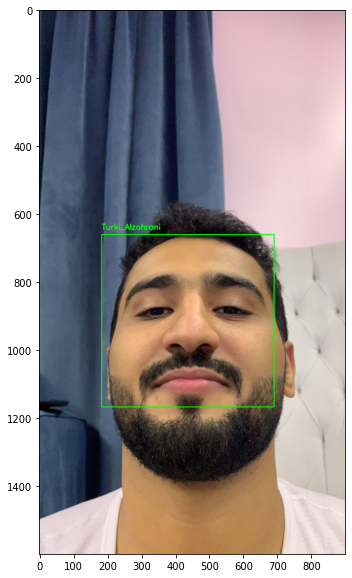

In [20]:
result = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10,10))
plt.imshow(result)